<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-statement---1" data-toc-modified-id="Problem-statement---1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem statement - 1</a></span><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA)</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Visualization</a></span></li><li><span><a href="#Simple-Linear-Regression" data-toc-modified-id="Simple-Linear-Regression-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Simple Linear Regression</a></span></li><li><span><a href="#Polynomial-regression" data-toc-modified-id="Polynomial-regression-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Polynomial regression</a></span></li><li><span><a href="#Standard-Transformation-fit" data-toc-modified-id="Standard-Transformation-fit-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Standard Transformation fit</a></span></li><li><span><a href="#Log-transformation" data-toc-modified-id="Log-transformation-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Log transformation</a></span></li><li><span><a href="#Square-root-transformation" data-toc-modified-id="Square-root-transformation-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Square root transformation</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Problem-statement---2" data-toc-modified-id="Problem-statement---2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem statement - 2</a></span><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Visualization</a></span></li><li><span><a href="#Simple-Linear-Regression" data-toc-modified-id="Simple-Linear-Regression-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Simple Linear Regression</a></span></li><li><span><a href="#Standard-Transformation" data-toc-modified-id="Standard-Transformation-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Standard Transformation</a></span></li><li><span><a href="#Log-transformation" data-toc-modified-id="Log-transformation-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Log transformation</a></span></li><li><span><a href="#Square-root-trasformation" data-toc-modified-id="Square-root-trasformation-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Square root trasformation</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></div>

### Problem statement - 1

1) Delivery_time -> Predict delivery time using sorting time 
------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

#### Exploratory Data Analysis (EDA) 

In [1]:
# EDA Libraries
import pandas as pd
import numpy as np

# Plotting library
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Model library
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Evaluation library
from sklearn.metrics import mean_squared_error

In [2]:
# Loading of dataset using pandas

data_df = pd.read_csv(r'./delivery_time.csv')

In [3]:
# Top 5 rows 
data_df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
# Bottom 5 rows
data_df.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [5]:
print('1. Shape of Dataset (Rows, Columns): ', data_df.shape)

1. Shape of Dataset (Rows, Columns):  (21, 2)


In [6]:
print('2. Technical summary of Dataset: \n')
print(data_df.info())

2. Technical summary of Dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes
None


In [7]:
# Checking duplicate entries
data_df.duplicated().sum()

0

In [8]:
print('3. Statistical summary of Dataset: \n', data_df.describe())

3. Statistical summary of Dataset: 
        Delivery Time  Sorting Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000


#### Visualization

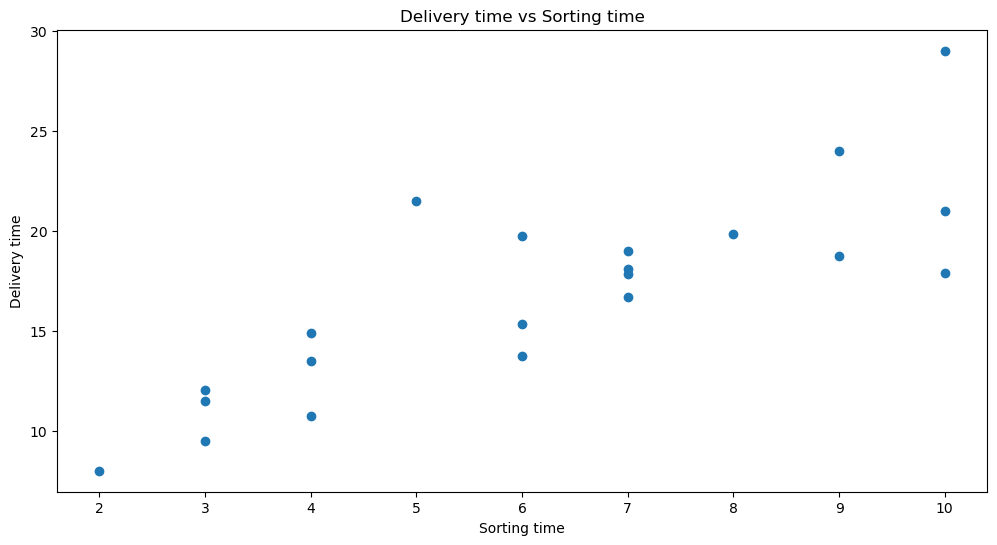

In [9]:
# Visualization of dataset

plt.figure(figsize=(12, 6))
plt.scatter(data=data_df, x='Sorting Time', y='Delivery Time')
plt.title('Delivery time vs Sorting time')
plt.xlabel('Sorting time')
plt.ylabel('Delivery time')
plt.show()

In [10]:
print('Correlation b/w Delivery time and Sorting time: \n', 
      data_df['Delivery Time'].corr(data_df['Sorting Time']))

Correlation b/w Delivery time and Sorting time: 
 0.8259972607955326


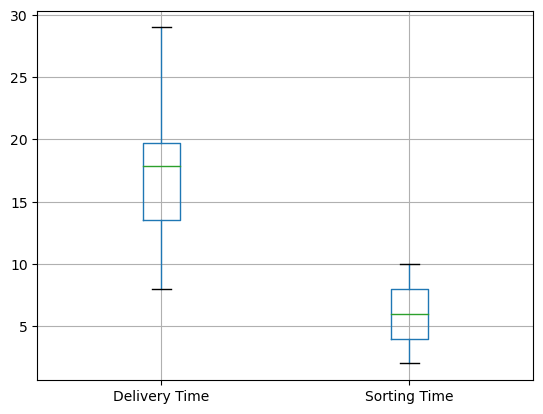

In [11]:
# Presence of outliers in dataset
data_df.boxplot()
plt.show()

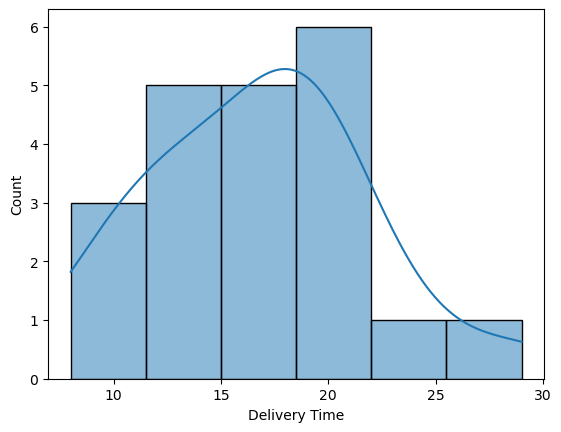

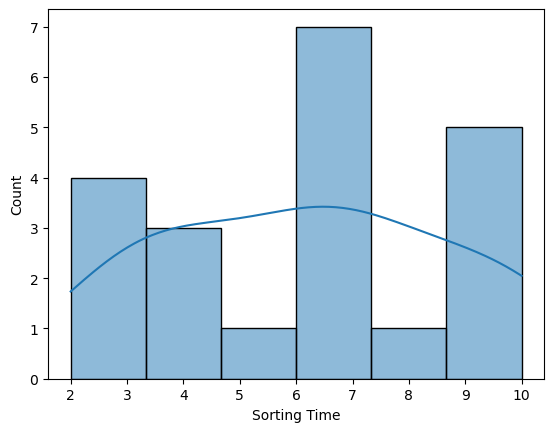

In [12]:
# Distribution of dataset

sns.histplot(data_df['Delivery Time'], kde=True)
plt.show()

sns.histplot(data_df['Sorting Time'], kde=True)
plt.show()

In [13]:
# Skewness in dataset
print('Skewness in Delivery time: ', data_df['Delivery Time'].skew())
print('Skewness in Sorting time: ', data_df['Sorting Time'].skew())

Skewness in Delivery time:  0.3523900822831107
Skewness in Sorting time:  0.047115474210530174


In [14]:
# Kurtosis
data_df.kurt()

Delivery Time    0.317960
Sorting Time    -1.148455
dtype: float64

Observations from above EDA 
1. Dataset has 21 rows of records and 2 columns Delevery time, Sorting time.
2. Data types of column datas are consistent.
3. No null values in the dataset.
4. Delivery time is positively corrleated to Sorting time by ~ 82.60%. Therefore, Linear regression   model fitting is explored.
5. No outliers observed in the dataset.
6. Positive skewness observed in the Delivery time data distribution.
7. Sorting time is nearly normal distiributed.

#### Simple Linear Regression

In [15]:
#1. Extraction of features

# Features - Sorting time
X = pd.DataFrame(data_df['Sorting Time']) # X data must be in DataFrame form

# Target value - Delivery time
y = data_df['Delivery Time']

In [16]:
#2. Training ML model - 
# a) Linear regression
# Initialization
lin_model = LinearRegression()

# Fitting model
lin_model.fit(X, y)

LinearRegression()

In [17]:
# Score, intercept and coefficient of linear model

y_predicts = lin_model.predict(X)
RMSE = mean_squared_error(y_predicts, y)**0.5
score = lin_model.score(X, y)
print('Score for linear regression model: ', np.round( score * 100, 2), '%')
print('Root Mean squared Error: ', np.round(RMSE, 2))
print('Linear model intercept: ', lin_model.intercept_)
print('Linear model coefficient: ', lin_model.coef_)

Score for linear regression model:  68.23 %
Root Mean squared Error:  2.79
Linear model intercept:  6.58273397199706
Linear model coefficient:  [1.6490199]


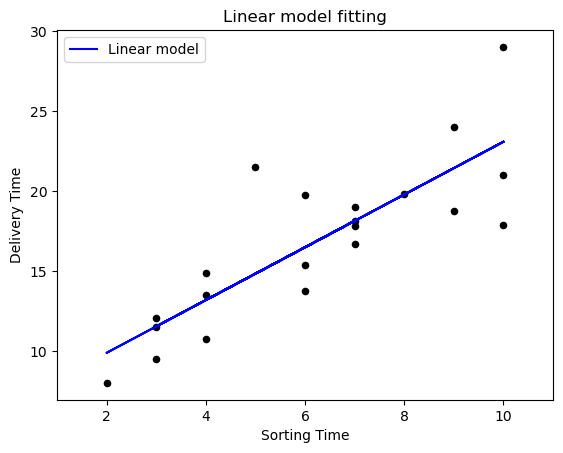

In [18]:
# Visualization of Linear model and dataset

# Dataset plotting
data_df.plot(kind='scatter', x='Sorting Time', y='Delivery Time', color='black', xlim=(1, 11))

# Linear model plotting
plt.plot(X, y_predicts, color='blue', label='Linear model')
plt.title('Linear model fitting')
plt.legend(loc='best')
plt.show()

#### Polynomial regression

In [19]:
#b) Polynomial regression fitting 

X_poly = pd.DataFrame([data_df['Sorting Time'],
                       data_df['Sorting Time'] ** 2,
                       data_df['Sorting Time'] ** 3]).T
y_poly = y

# Polynomial model initialization
poly_model = LinearRegression()
poly_model.fit(X_poly, y_poly)
y_poly_predicts = poly_model.predict(X_poly)

# Score, intercept and coefficient of linear model
RMSE_poly = mean_squared_error(y_poly_predicts, y_poly)**0.5
score_poly = poly_model.score(X_poly, y_poly)
print('Score for Polynomial regression of degree 3 model: ', np.round(score_poly * 100, 2), '%')
print('Root Mean squared Error: ', np.round(RMSE_poly, 2))
print('Polynomial model intercept: ', poly_model.intercept_)
print('Polynomial model coefficient: ', poly_model.coef_)

Score for Polynomial regression of degree 3 model:  70.34 %
Root Mean squared Error:  2.7
Polynomial model intercept:  -4.158176960869284
Polynomial model coefficient:  [ 7.50247907 -0.92525451  0.04445608]


C:\Users\umesh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


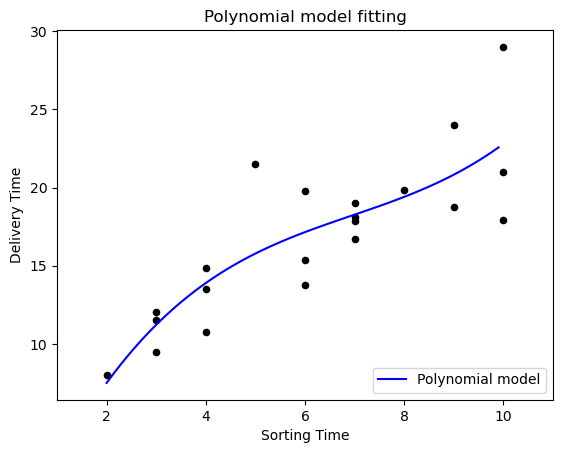

In [20]:
# Visualization of Polynomial model and dataset

# Dataset plotting
data_df.plot(kind='scatter', x='Sorting Time', y='Delivery Time', color='black', xlim=(1, 11))

# Polynomial model plotting
poly_range = np.arange(2, 10, 0.1)

X_poly_range = pd.DataFrame([poly_range,
                       poly_range ** 2,
                      poly_range ** 3]).T

y_poly_predicts = poly_model.predict(X_poly_range)

plt.plot(poly_range, y_poly_predicts, color='blue', label='Polynomial model')
plt.title('Polynomial model fitting')
plt.legend(loc=4)
plt.show()

#### Standard Transformation fit

In [21]:
#1) Linear regression fitting by standard transformation 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(pd.DataFrame(y))

# linear model initialization
lin_std_model = LinearRegression()
lin_std_model.fit(X_scaled, y_scaled)
y_std_predicts = lin_std_model.predict(X_scaled)

# Score, intercept and coefficient of linear model
RMSE_std = mean_squared_error(y_std_predicts, y_scaled)**0.5
score_std = lin_std_model.score(X_scaled, y_scaled)
print('Score for standard scaled linear regression model: ', round(score_std * 100, 2), '%')
print('Root Mean squared Error: ', round(RMSE_std,2))

Score for standard scaled linear regression model:  68.23 %
Root Mean squared Error:  0.56


#### Log transformation

In [22]:
#2) Linear regression fitting by log transformation 

X_log = np.log(X)
y_log = np.log(y)

# linear model initialization
log_std_model = LinearRegression()
log_std_model.fit(X_log, y_log)
y_log_predicts = log_std_model.predict(X_log)

# Score, intercept and coefficient of linear model
RMSE_log = mean_squared_error(y_log_predicts, y_log)**0.5
score_log = log_std_model.score(X_log, y_log)
print('Score for log scaled linear regression model: ', round(score_log * 100, 2), "%")
print('Root Mean squared Error: ', round(RMSE_log, 2))

Score for log scaled linear regression model:  77.22 %
Root Mean squared Error:  0.15


#### Square root transformation

In [23]:
#3) Linear regression fitting by square root transformation 

X_sqrt = np.sqrt(X)
y_sqrt = np.sqrt(y)

# linear model initialization
sqrt_std_model = LinearRegression()
sqrt_std_model.fit(X_sqrt, y_sqrt)
y_sqrt_predicts = sqrt_std_model.predict(X_sqrt)

# Score, intercept and coefficient of linear model
RMSE_sqrt = mean_squared_error(y_sqrt_predicts, y_sqrt)**0.5
score_sqrt = sqrt_std_model.score(X_sqrt, y_sqrt)
print('Score for Square root scaled linear regression model: ', round(score_sqrt * 100, 2), "%")
print('Root Mean squared Error: ', round(RMSE_sqrt, 2))

Score for Square root scaled linear regression model:  72.92 %
Root Mean squared Error:  0.32


#### Conclusion

In [24]:
# Summary table
print('Comparison table of Score and RMSE of various Linear regression models.')
summary = {"Model/Metric":['Accuracy', 'RMSE Value'],
          "Linear regression model":[score, RMSE],
           "Polynomial regression of degree 3":[score_poly, RMSE_poly],
           "Standard Scaled LR":[score_std, RMSE_std],
           "Log Scaled LR":[score_log, RMSE_log],
           "Square root Scaled LR":[score_sqrt, RMSE_sqrt],
    }

print(pd.DataFrame(summary).T)

Comparison table of Score and RMSE of various Linear regression models.
                                          0           1
Model/Metric                       Accuracy  RMSE Value
Linear regression model            0.682271     2.79165
Polynomial regression of degree 3  0.703432    2.697085
Standard Scaled LR                 0.682271    0.563674
Log Scaled LR                      0.772161    0.148233
Square root Scaled LR              0.729201     0.31791


Conclusion: 
From above results, Log scaled linear regression model has higher accuracy of 77.21% and lower rmse of 0.14. So, linear regression model with log transformation is better model for the given problem statement.

### Problem statement - 2

2) Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary 
transformations and select the best model using R or Python.

#### Exploratory Data Analysis

In [25]:
# Loading dataset
data_df = pd.read_csv(r"./Salary_Data.csv")
data_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [26]:
print('Shape of dataset (rows, columsn):', data_df.shape)

Shape of dataset (rows, columsn): (30, 2)


In [27]:
print('Technical summary of dataset:')
data_df.info()

Technical summary of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [28]:
print('Presence of null values: ')
data_df.isnull().sum()

Presence of null values: 


YearsExperience    0
Salary             0
dtype: int64

In [29]:
# Presence of duplicate values
data_df.duplicated().sum()

0

#### Visualization

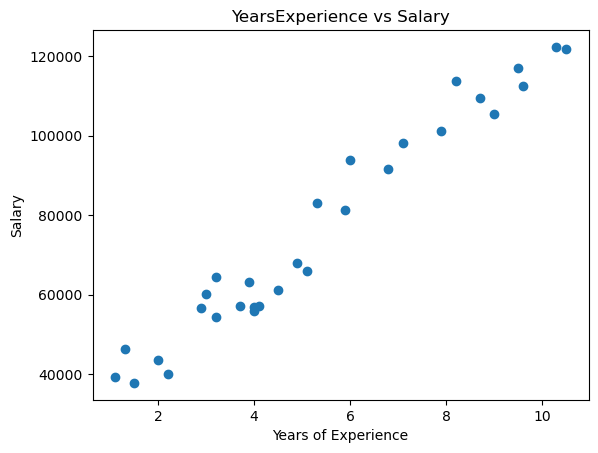

In [30]:
# Visualization of dataset
plt.scatter(data=data_df, x='YearsExperience', y='Salary')
plt.title('YearsExperience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [31]:
# Correlation between variables
print('Correlation b/w Years of experience and Salary is', 
      data_df['YearsExperience'].corr(data_df['Salary']))

Correlation b/w Years of experience and Salary is 0.9782416184887599


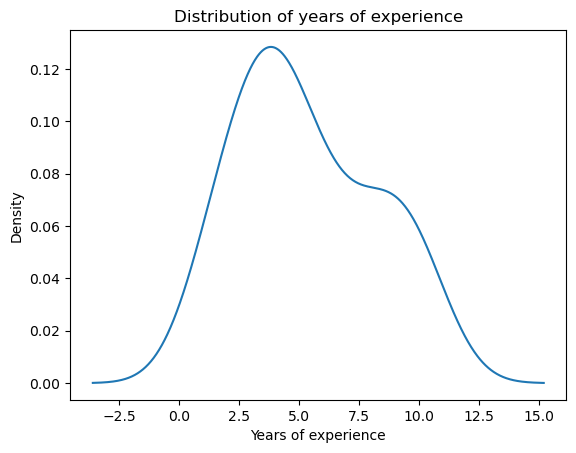

In [32]:
# Distribution of datas 
data_df['YearsExperience'].plot(kind='kde')
plt.title('Distribution of years of experience')
plt.xlabel('Years of experience')
plt.show()

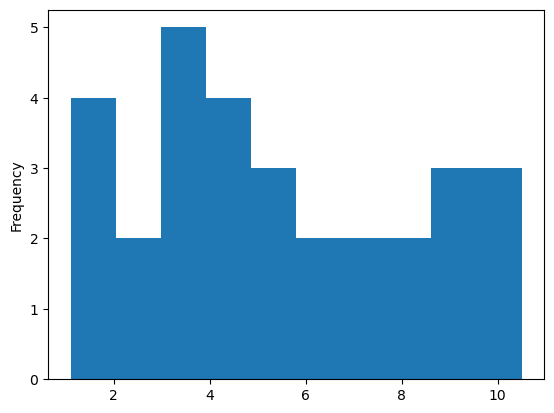

In [33]:
data_df['YearsExperience'].plot(kind='hist')
plt.show()

In [34]:
print('Skewness in Years of experience data: ', data_df['YearsExperience'].skew())

Skewness in Years of experience data:  0.37956024064804106


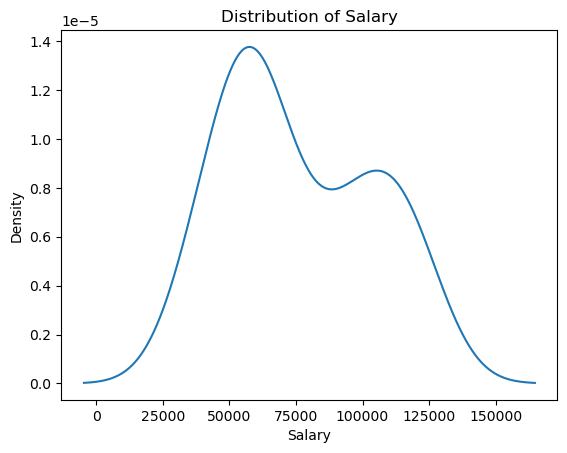

In [35]:
data_df['Salary'].plot(kind='kde')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.show()

In [36]:
print('Skewness in Salary data: ', data_df['Salary'].skew())

Skewness in Salary data:  0.35411967922959153


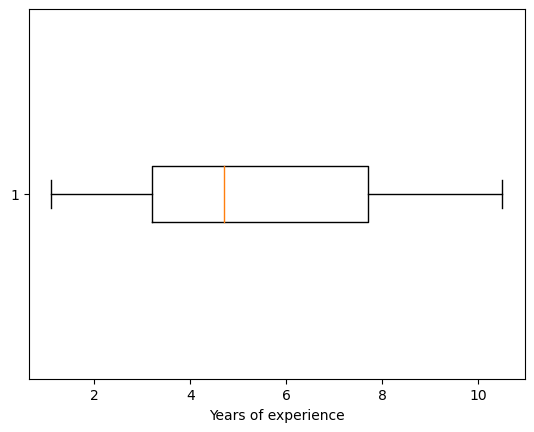

In [37]:
# Presence of outliers
plt.boxplot(data_df['YearsExperience'], vert=False)
plt.xlabel('Years of experience')
plt.show()

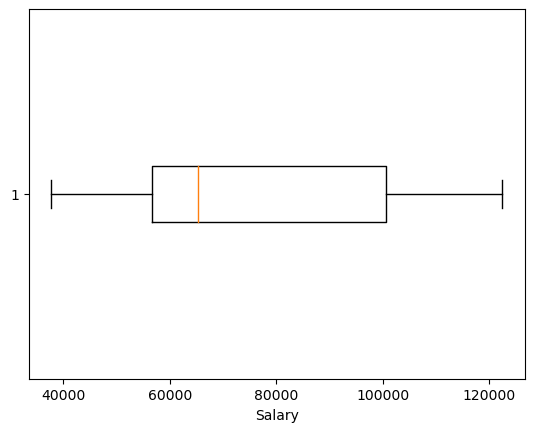

In [38]:
plt.boxplot(data_df['Salary'], vert=False)
plt.xlabel('Salary')
plt.show()

Observations from above EDA 
1. Dataset has 30 rows of records and 2 columns YearsExperience, Salary.
2. Data types of column datas are consistent.
3. No null values in the dataset.
4. Salary is positively corrleated to Years Experience by ~ 97.82%. 
   Therefore, varrious Linear regression model fitting is explored.
5. No outliers observed in the dataset.
6. Both Years of experience and Salary datas are nearly normal distiributed.

#### Simple Linear Regression

In [39]:
# Extraction of features

# Independent variable - predictor variable
x = pd.DataFrame(data_df['YearsExperience'])

# Dependent variable - explanatory variable
y = data_df['Salary']

In [40]:
# Training the model 
# a) Linear regression model

# Initialization of model
linear_model = LinearRegression()
linear_model.fit(x, y)
y_pred_lin = linear_model.predict(x)

# Score, intercept and coefficient of linear model
RMSE = mean_squared_error(y_pred_lin, y)**0.5
score = linear_model.score(x, y)
print('Score for linear regression model: ', round(score * 100, 2))
print('Root Mean squared Error: ', RMSE)
print('Linear model intercept: ', linear_model.intercept_)
print('Linear model coefficient: ', linear_model.coef_)

Score for linear regression model:  95.7
Root Mean squared Error:  5592.043608760662
Linear model intercept:  25792.20019866871
Linear model coefficient:  [9449.96232146]


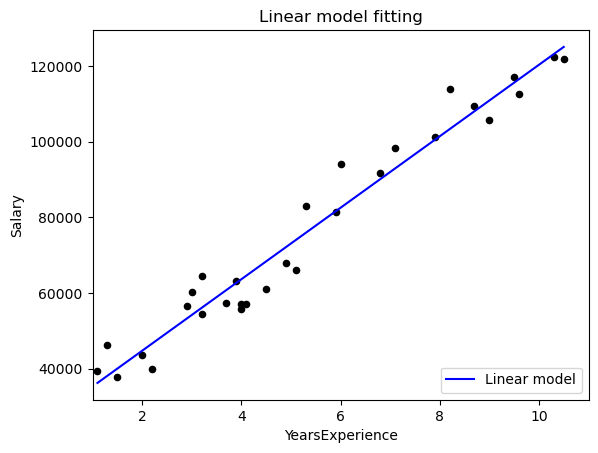

In [41]:
# Visualization of Linear model and dataset

# Dataset plotting
data_df.plot(kind='scatter', x='YearsExperience', y='Salary', color='black', xlim=(1, 11))

# Linear model plotting
plt.plot(x, y_pred_lin, color='blue', label='Linear model')
plt.title('Linear model fitting')
plt.legend(loc=4)
plt.show()

In [42]:
#b) Polynomial regression fitting 

x_poly = pd.DataFrame([data_df['YearsExperience'],
                       data_df['YearsExperience'] ** 2,
                       data_df['YearsExperience'] ** 3,
                      data_df['YearsExperience'] ** 4,
                      data_df['YearsExperience'] ** 5,
                      data_df['YearsExperience'] ** 6,
                      data_df['YearsExperience'] ** 7,
                      data_df['YearsExperience'] ** 8,
                      data_df['YearsExperience'] ** 9,
                      data_df['YearsExperience'] ** 10,
                      data_df['YearsExperience'] ** 11,
                      data_df['YearsExperience'] ** 12]).T
y_poly = y

# Polynomial model initialization
poly_model = LinearRegression()
poly_model.fit(x_poly, y_poly)
y_poly_pred = poly_model.predict(x_poly)

# Score, intercept and coefficient of linear model
RMSE_poly = mean_squared_error(y_poly_pred, y_poly)**0.5
score_poly = poly_model.score(x_poly, y_poly)
print('Score for Polynomial regression model: ', round(score_poly * 100, 2))
print('Root Mean squared Error: ', RMSE_poly)
print('Polynomial model intercept: ', poly_model.intercept_)
print('Polynomial model coefficient: ', poly_model.coef_)

Score for Polynomial regression model:  98.31
Root Mean squared Error:  3508.9384587604004
Polynomial model intercept:  -568529.1563873291
Polynomial model coefficient:  [ 1.26575383e+06 -4.81212198e+05 -8.37115570e+05  1.11266279e+06
 -6.28078659e+05  2.08710964e+05 -4.46435110e+04  6.33053649e+03
 -5.92751801e+02  3.52686773e+01 -1.20896743e+00  1.81867754e-02]


C:\Users\umesh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


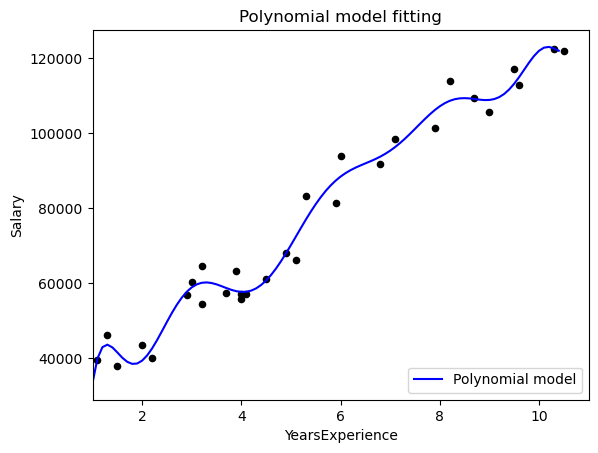

In [43]:
# Visualization of Polynomial model fitting and dataset

# Dataset plotting
data_df.plot(kind='scatter', x='YearsExperience', y='Salary', color='black', xlim=(1, 11))

# Polynomial model plotting
poly_range = np.arange(1, 10.5, 0.1)

X_poly_range = pd.DataFrame([poly_range,
                       poly_range ** 2,
                      poly_range ** 3,
                      poly_range ** 4,
                      poly_range ** 5,
                      poly_range ** 6,
                      poly_range ** 7,
                      poly_range ** 8,
                      poly_range ** 9,
                      poly_range ** 10,
                      poly_range ** 11,
                      poly_range ** 12]).T

y_poly_predicts = poly_model.predict(X_poly_range)

plt.plot(poly_range, y_poly_predicts, color='blue', label='Polynomial model')
plt.title('Polynomial model fitting')
plt.legend(loc=4)
plt.show()

#### Standard Transformation

In [44]:
#c) Linear regression fitting by scaling / transformation 
scaler = StandardScaler()
X_std = scaler.fit_transform(x)
y_std = scaler.fit_transform(pd.DataFrame(y))

# linear model initialization
linear_std_model = LinearRegression()
linear_std_model.fit(X_std, y_std)
y_std_predicts = linear_std_model.predict(X_std)
RMSE_std = mean_squared_error(y_std_predicts, y_std)**0.5
score_std = linear_std_model.score(X_std, y_std)
print('Score for scaled linear regression model: ', round(score_std * 100, 2))
print('Root Mean squared Error: ', RMSE_std)

Score for scaled linear regression model:  95.7
Root Mean squared Error:  0.20746887924816934


#### Log transformation

In [45]:
#d) Linear regression fitting by log transformation 
x_log = np.log(x)
y_log = np.log(y)

# linear model initialization
log_std_model = LinearRegression()
log_std_model.fit(x_log, y_log)
y_log_predicts = log_std_model.predict(x_log)

# Score, intercept and coefficient of linear model
RMSE_log = mean_squared_error(y_log_predicts, y_log)**0.5
score_log = log_std_model.score(x_log, y_log)
print('Score for log scaled linear regression model: ', round(score_log * 100, 2))
print('Root Mean squared Error: ', RMSE_log)

Score for log scaled linear regression model:  90.52
Root Mean squared Error:  0.11163070330504787


#### Square root trasformation

In [46]:
#e) Linear regression fitting by square root transformation 
x_sqrt = np.sqrt(x)
y_sqrt = np.sqrt(y)

# linear model initialization
sqrt_std_model = LinearRegression()
sqrt_std_model.fit(x_sqrt, y_sqrt)
y_sqrt_predicts = sqrt_std_model.predict(x_sqrt)

# Score, intercept and coefficient of linear model
RMSE_sqrt = mean_squared_error(y_sqrt_predicts, y_sqrt)**0.5
score_sqrt = sqrt_std_model.score(x_sqrt, y_sqrt)
print('Score for Square root scaled linear regression model: ', round(score_sqrt*100, 2))
print('Root Mean squared Error: ', RMSE_sqrt)

Score for Square root scaled linear regression model:  94.19
Root Mean squared Error:  11.765354505779554


#### Conclusion

In [47]:
# Summary table
print('Comparison table of Score and RMSE of various Linear regression models.')
summary_2 = {"Model/Metric":['Accuracy', 'RMSE Value'],
          "Linear regression model":[score, RMSE],
           "Polynomial regression of degree 3":[score_poly, RMSE_poly],
           "Standard Scaled LR":[score_std, RMSE_std],
           "Log Scaled LR":[score_log, RMSE_log],
           "Square root Scaled LR":[score_sqrt, RMSE_sqrt],
    }

print(pd.DataFrame(summary_2).T)

Comparison table of Score and RMSE of various Linear regression models.
                                          0            1
Model/Metric                       Accuracy   RMSE Value
Linear regression model            0.956957  5592.043609
Polynomial regression of degree 3  0.983052  3508.938459
Standard Scaled LR                 0.956957     0.207469
Log Scaled LR                      0.905215     0.111631
Square root Scaled LR              0.941949    11.765355


Conclusion: 
Polynomial regression model of degree 12 with 98.30% accuracy is best fitting model. However, Log scaled linear regression model has lower rmse value of 0.11.